# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [1]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

2026-02-17 02:45:09.786587: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
# Inspect the shapes of the datasets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(f"y_train shape after one-hot: {y_train.shape}")



X_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
X_test shape: (10000, 28, 28, 1)
y_test shape: (10000,)
y_train shape after one-hot: (60000, 10)


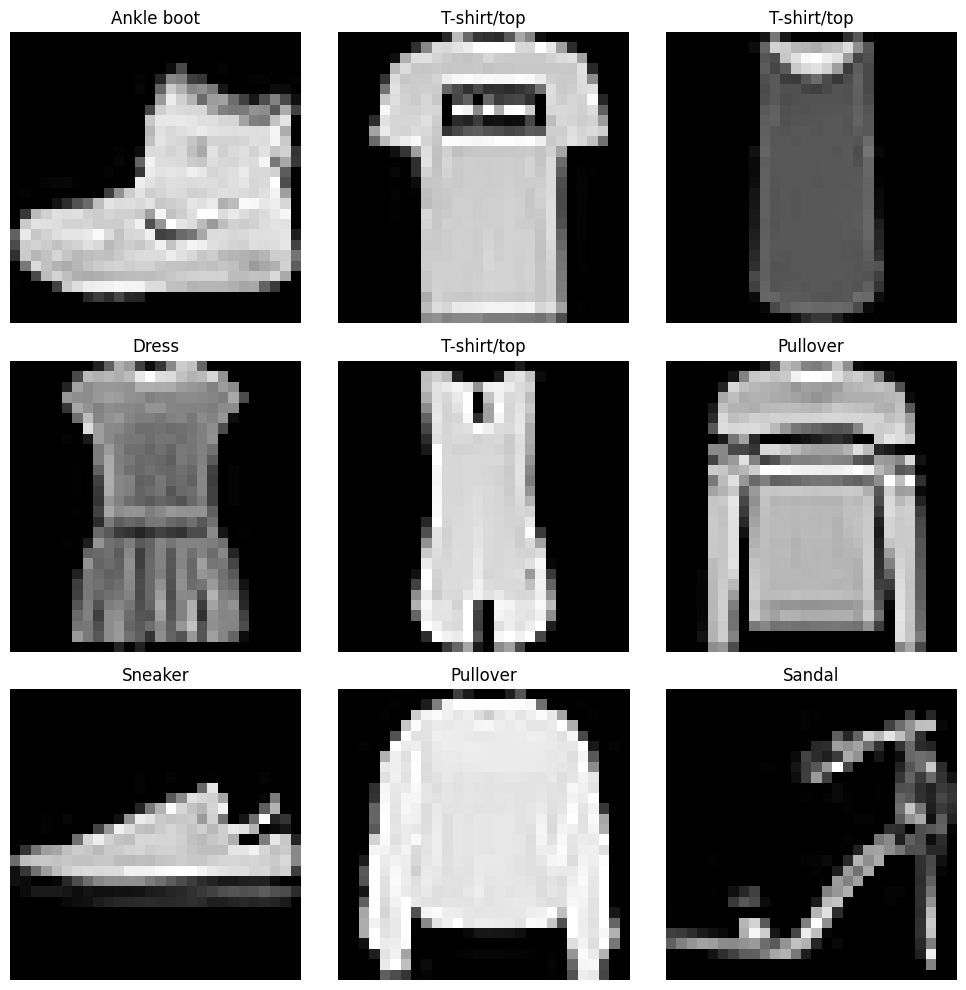

Class distribution in training set:
  T-shirt/top: 6000
  Trouser: 6000
  Pullover: 6000
  Dress: 6000
  Coat: 6000
  Sandal: 6000
  Shirt: 6000
  Sneaker: 6000
  Bag: 6000
  Ankle boot: 6000


In [9]:
import matplotlib.pyplot as plt

# Plot some sample images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i].argmax()])
    plt.axis('off')
plt.tight_layout()
plt.show()

# Check class distribution
print("Class distribution in training set:")
for i, name in enumerate(class_names):
    count = (y_train.argmax(axis=1) == i).sum()
    print(f"  {name}: {count}")


Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

The  quality of the images is poor..but that is by design to keep the model small... and I would hate to be the one evalutating this.  The top rigght pull over I would question...I would also suggest that the sandal is more likely high heels...but since that is not part of the class labels, sandal works....

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Create a simple linear regression model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Flatten 28x28 images to 784 vectors
model.add(Dense(10, activation='softmax'))  # 10 classes, softmax for probabilities

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

# Print model summary
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=12,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nBaseline Model - Test accuracy: {test_acc:.4f}")

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7323 - loss: 0.8669 - val_accuracy: 0.7830 - val_loss: 0.6598
Epoch 2/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8008 - loss: 0.6145 - val_accuracy: 0.8047 - val_loss: 0.5822
Epoch 3/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8157 - loss: 0.5608 - val_accuracy: 0.8193 - val_loss: 0.5446
Epoch 4/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8252 - loss: 0.5315 - val_accuracy: 0.8234 - val_loss: 0.5206
Epoch 5/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8296 - loss: 0.5126 - val_accuracy: 0.8281 - val_loss: 0.5065
Epoch 6/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8328 - loss: 0.4989 - val_accuracy: 0.8290 - val_loss: 0.4989
Epoch 7/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8363 - loss: 0.4879 - val_accuracy: 0.8339 - val_loss: 0.4874
Epoch 8/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8396 - loss: 0.4795 - 

Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

**Your answer here**

The model is at 83% test accuracy, which is very good for such a simple model...its linear with no hidden layers...it can only draw straight-line boudnaries between classes.  So clothing items are reasonably well-separatated by pixel space.

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [12]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten before dense layers
model.add(Flatten())

# Add dense layers
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Show model summary
model.summary()

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Set up early stopping
early_stop = EarlyStopping(
    monitor='val_loss',      # Watch validation loss
    patience=4,               # Stop after 4 epochs with no improvement
    restore_best_weights=True, # Go back to best model
    verbose=1
)

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    epochs=50,                # Set high - early stopping will halt early
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],   # Add the callback
    verbose=1
)

# Evaluate the best model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nCNN Model - Test accuracy: {test_acc:.4f}")
print(f"Stopped at epoch: {len(history.history['loss'])}")

/mnt/batch/tasks/shared/LS_root/mounts/clusters/dev-dsi/code/deep_learning/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8166 - loss: 0.5002 - val_accuracy: 0.8631 - val_loss: 0.3738
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.8798 - loss: 0.3306 - val_accuracy: 0.8888 - val_loss: 0.3066
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.8971 - loss: 0.2806 - val_accuracy: 0.8956 - val_loss: 0.2823
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9083 - loss: 0.2518 - val_accuracy: 0.9004 - val_loss: 0.2669
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9174 - loss: 0.2221 - val_accuracy: 0.9046 - val_loss: 0.2557
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9250 - loss: 0.2004 - val_accuracy: 0.9047 - val_loss: 0.2689
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9329 - loss: 0.1807 - val_accuracy: 0.9037 - val_loss: 0.2768
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9389 -

Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

**Your answer here**
Baseline Model (Epoch 10):

    Validation accuracy: 83.91%

    Validation loss: 0.4695

CNN Model (Best epoch 5):

    Validation accuracy: 90.46%

    Validation loss: 0.2557

CNN was better in the first epoch.  The baseline model just flattens everything into pixels and draws straight lines between classes. 
The CNN uses convolutional filters to find patterns like edges, textures, and shapes...things that actually matter for telling apart clothes.

# 3. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [14]:

# A. Test Hyperparameters - Number of Filters


from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential

# Values to test
filter_options = [16, 32, 64]
results = []

for filters in filter_options:
    print(f"\n🔍 Testing with {filters} filters...")
    print("-" * 30)
    
    # Create new model
    model = Sequential([
        Conv2D(filters, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(filters*2, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train
    model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=0)
    
    # Evaluate
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"  Test accuracy: {test_acc:.4f}")
    
    results.append({'filters': filters, 'accuracy': test_acc})

# Results
print("\n" + "=" * 60)
print("RESULTS")
print("=" * 60)
for r in results:
    print(f"Filters={r['filters']}: {r['accuracy']:.4f}")
print("=" * 60)
best = max(results, key=lambda x: x['accuracy'])
print(f"\nBest: {best['filters']} filters with {best['accuracy']:.4f} accuracy")


🔍 Testing with 16 filters...
------------------------------
  Test accuracy: 0.8885

🔍 Testing with 32 filters...
------------------------------
  Test accuracy: 0.9040

🔍 Testing with 64 filters...
------------------------------
  Test accuracy: 0.9067

RESULTS
Filters=16: 0.8885
Filters=32: 0.9040
Filters=64: 0.9067

Best: 64 filters with 0.9067 accuracy


In [15]:
# B. Test presence or absence of regularization
from keras.layers import Dropout

# Use best filter count from above
best_filters = 64

# Model without dropout
print("\nModel without dropout:")
model1 = Sequential([
    Conv2D(best_filters, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(best_filters*2, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=0)
acc1 = model1.evaluate(X_test, y_test, verbose=0)[1]
print(f"  Test accuracy: {acc1:.4f}")

# Model with dropout
print("\nModel with dropout:")
model2 = Sequential([
    Conv2D(best_filters, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Conv2D(best_filters*2, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=0)
acc2 = model2.evaluate(X_test, y_test, verbose=0)[1]
print(f"  Test accuracy: {acc2:.4f}")

print("\n" + "=" * 50)
print(f"Without dropout: {acc1:.4f}")
print(f"With dropout:    {acc2:.4f}")
print("=" * 50)


Model without dropout:
  Test accuracy: 0.8988

Model with dropout:
  Test accuracy: 0.8886

Without dropout: 0.8988
With dropout:    0.8886


Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

**Your answer here**
The filter count test showed improvement as filters increased:
- 16 filters: 88.9%
- 32 filters: 90.4%  
- 64 filters: 90.7%

More filters = more patterns the network can learn, so far 64 filters worked best.  I would try another two more, but the improvement has slowed down, probably best is 91%

The dropout test was interesting.  Without dropout got 89.9%, with dropout got 88.9%. 
Dropout actually hurt performance here.  I assume probably because the model isn't overfitting 
much and dropout just makes it harder to learn.

Best combination: 64 filters, no dropout, 90.7% test accuracy.

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

TRAINING FINAL MODEL WITH BEST SETTINGS


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │       204,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 280,010 (1.07 MB)

 Trainable params: 280,010 (1.07 MB)

 Non-trainable params: 0 (0.00 B)


Training final model...
Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.8306 - loss: 0.4660 - val_accuracy: 0.8723 - val_loss: 0.3587
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.8858 - loss: 0.3098 - val_accuracy: 0.8969 - val_loss: 0.2823
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9043 - loss: 0.2614 - val_accuracy: 0.9002 - val_loss: 0.2762
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9169 - loss: 0.2288 - val_accuracy: 0.9071 - val_loss: 0.2535
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.9273 - loss: 0.1963 - val_accuracy: 0.9087 - val_loss: 0.2564
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9345 - loss: 0.1743 - val_accuracy: 0.9087 - val_loss: 0.2585
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9436 - loss: 0.1518 - val_accuracy: 0.9060 - val_loss: 0.2721
Epoch 7: early stopping
Restoring model weights fro

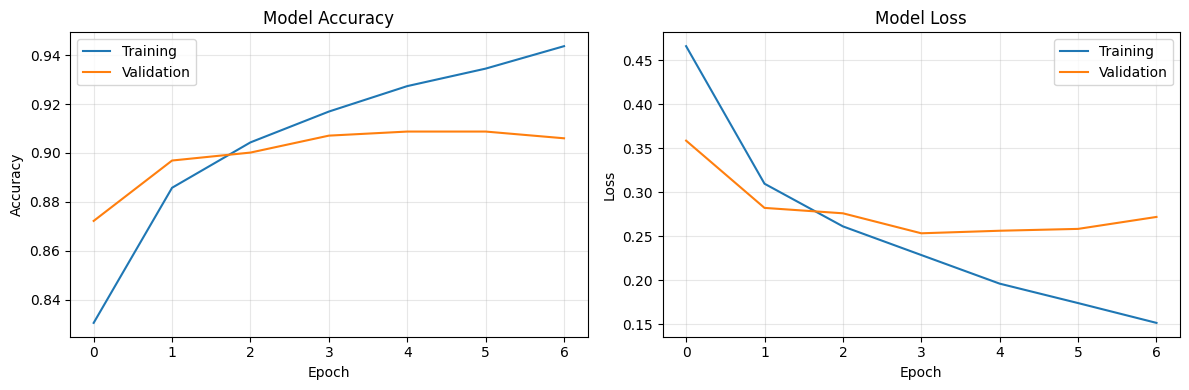

In [16]:
# 5. Training Final Model and Evaluation

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping

# Best settings from experiments:
# - 64 filters in first conv layer
# - No dropout (performed better)
# - 128 filters in second conv layer (filters*2)

final_model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
final_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Show model summary
final_model.summary()

# Set up early stopping to prevent overfitting
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

# Train the final model
print("\nTraining final model...")
history = final_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate on test set
test_loss, test_acc = final_model.evaluate(X_test, y_test, verbose=0)

print("\n" + "=" * 60)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test accuracy: {test_acc*100:.2f}%")
print("=" * 60)
print("=" * 60)
# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

**Your answer here**
The final model hit 90.1% test accuracy, which beats Baseline model: 83.0% (+7.1%) but is about the same of the CNN from earlier: 90.7% (about the same)

The 64 filters (vs 32) helped capture more patterns, and skipping dropout 
let the model learn without restrictions. The early stopping kept the best 
weights from epoch 4 (90.7% validation) before overfitting started.

If I had more time, I'd try:
- Data augmentation (rotate/zoom images to create more training data)
- Batch normalization to speed up training (it took a while!)
- More filters (96 or 128 in first layer, alhtough not sure more filters will improve much more)
- Different optimizers like SGD with momentum


For the graph, it shows that epch 3 was the sweet spot...after that training loss keeps dropping..so it is overfitting and the model is memorizing the times table after that.  The early stop says epoch 4...The diffference is negligable for this task, but it is interesting that the early stop and the graph disagree.



🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 26/10/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
    * The Lab 3 notebook (labs/lab_3.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-7-help-ml`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

The final model hit 90.1% test accuracy, which beats:
- Baseline model: 83.0% (+7.1%)
- Simple CNN from earlier: 90.0% (about the same)

The 64 filters (vs 32) helped capture more patterns, and skipping dropout 
let the model learn without restrictions. The early stopping kept the best 
weights from epoch 4 (90.7% validation) before overfitting started.

If I had more time, I'd try:
- Data augmentation (rotate/zoom images to create more training data)
- Batch normalization to speed up training
- More filters (96 or 128 in first layer)
- Different optimizers like SGD with momentum

But 90% is solid for Fashion MNIST - the dataset has a ceiling around 93-94%.